* data 폴더를 만들어 csv 파일들을 모두 넣고 시작했습니다.

## Package Import

In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

import re

plt.rc('font', family='NanumGothic')

warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

## Random seed fix

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    #torch.manual_seed(seed)
    #torch.cuda.manual_seed(seed)
    #torch.backends.cudnn.deterministic = True
    #torch.backends.cudnn.benchmark = True

seed_everything(77) # Seed 고정

# Data Load & EDA

## brand_keyword_cnt

In [3]:
brand_keyword = pd.read_csv('./data/brand_keyword_cnt.csv')

display(brand_keyword)

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0.84131,0.91383,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,...,0.319110,0.391640,0.377130,0.49318,0.072520,0.29010,0.31911,0.232080,0.333620,0.44966
1,B002-00002,12.64868,20.27850,15.332170,12.750210,13.562510,13.707570,11.937910,15.564250,14.084710,...,10.269790,11.966920,10.646930,10.41485,10.487380,9.48651,9.28343,10.429350,11.154620,11.38671
2,B002-00003,0.33362,0.43516,0.362630,0.174060,0.217580,0.464170,0.420650,0.290100,0.377130,...,0.536690,0.696250,0.449660,0.39164,1.029880,0.49318,0.91383,0.797790,1.015370,0.88482
3,B002-00005,1.07339,1.71163,2.016240,1.914700,1.987230,2.146790,1.682620,1.378000,1.421520,...,2.219320,2.509420,2.872060,2.37888,2.030750,1.53756,1.34899,1.261960,2.320850,2.30635
4,B002-00006,0.00000,0.00000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,...,0.072526,0.290103,0.087012,0.00000,0.130542,0.00000,0.00000,0.072526,0.217577,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,B002-03794,2.32085,2.98810,3.611830,4.061500,3.669850,3.771390,3.031620,2.988100,3.133150,...,2.422390,2.422390,2.756010,2.32085,2.088770,1.98723,1.07339,1.929210,2.509420,1.78416
3166,B002-03795,0.14505,0.00000,0.087030,0.072520,0.087030,0.101530,0.072520,0.130540,0.116040,...,0.000000,0.072520,0.000000,0.10153,0.101530,0.00000,0.00000,0.000000,0.000000,0.00000
3167,B002-03796,0.00000,0.00000,0.000000,0.000000,0.000000,0.101530,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.072520,0.07252
3168,B002-03798,0.14505,0.00000,0.116040,0.072520,0.116040,0.275600,0.217580,0.116040,0.101530,...,0.101530,0.087030,0.145050,0.17406,0.188560,0.11604,0.11604,0.087030,0.174060,0.10153


In [4]:
## 중복 여부 확인
print(len(brand_keyword['브랜드'].unique()))

3170


In [5]:
## 결측치, 최대,최소 값 확인
print(brand_keyword.iloc[:,1:].max().max()) #일일 관련 키워드 언급량을 정규화한 값 중 최댓값
print(brand_keyword.iloc[:,1:].min().min())
print('*'*50)
print(brand_keyword.isna().sum())
print('*'*50)
display(brand_keyword.loc[brand_keyword['2022-01-01'].isna()])

13383.3178
0.0
**************************************************
브랜드            0
2022-01-01    35
2022-01-02    35
2022-01-03    35
2022-01-04    35
              ..
2023-03-31    35
2023-04-01    35
2023-04-02    35
2023-04-03    35
2023-04-04    35
Length: 460, dtype: int64
**************************************************


,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
95,B002-00117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,B002-00296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,B002-00302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,B002-00366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,B002-00460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,B002-00533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,B002-00538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,B002-00567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,B002-00630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,B002-00780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 랜덤하게 6개를 뽑아 살펴보기로 한다.
random_rows = brand_keyword.sample(n=6, random_state=77)
random_rows.reset_index(inplace=True,drop=True)
random_rows = random_rows.T
random_rows.columns = random_rows.loc['브랜드']
random_rows.drop(index = '브랜드',inplace=True)

display(random_rows)

브랜드,B002-01434,B002-00043,B002-00389,B002-02777,B002-00936,B002-02886
2022-01-01,0.07252,0.30459,0.0,10.588988,29.10489,9.444031
2022-01-02,0.21758,0.261099,0.0,11.169223,33.399074,10.169275
2022-01-03,0.14505,0.391633,0.087023,11.996032,123.528919,34.715407
2022-01-04,0.23208,0.478677,0.11603,13.156459,138.053553,32.698949
2022-01-05,0.07252,0.594714,0.0,16.101091,124.037091,34.787932
...,...,...,...,...,...,...
2023-03-31,0.0,0.87031,0.101504,17.290526,133.917382,21.71698
2023-04-01,0.11604,1.000875,0.11603,15.114709,30.671123,9.444031
2023-04-02,0.11604,1.349017,0.0,15.767452,28.030395,8.39954
2023-04-03,0.33362,1.53757,0.11603,18.799107,133.453453,23.138785


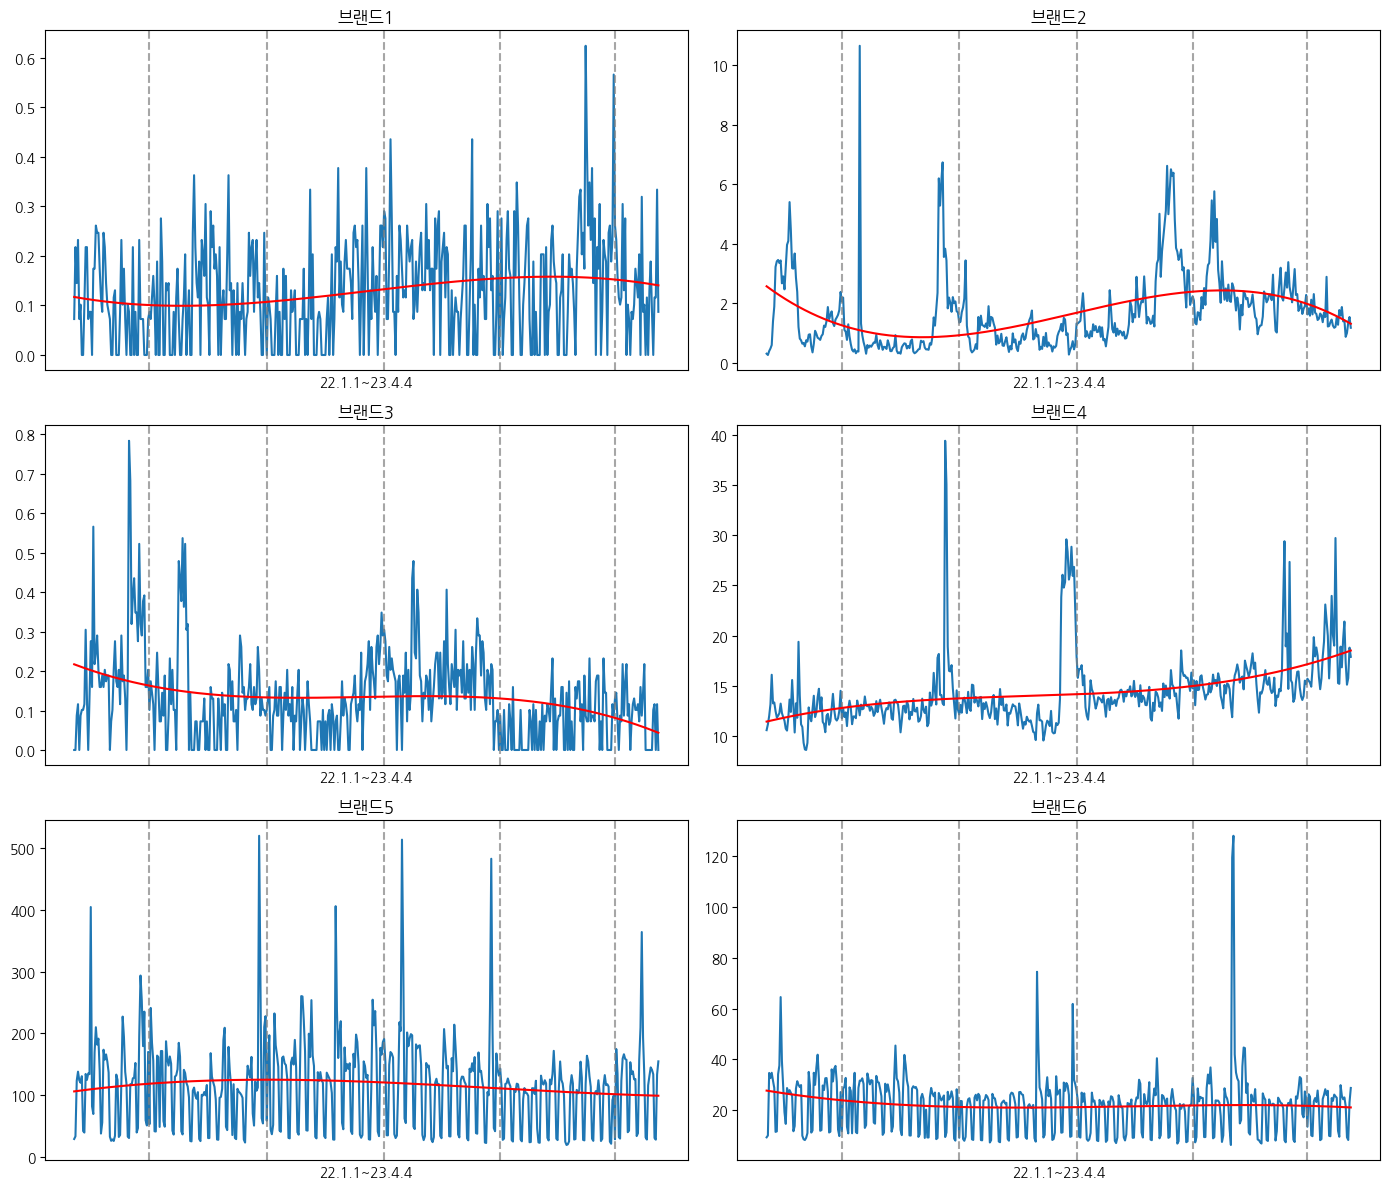

In [7]:
plt.figure(figsize=(14, 12))

for i in range(0,6) :
    plt.subplot(3, 2, i+1)
    plt.plot(random_rows.index, random_rows.iloc[:,i])
    plt.xticks([]) #눈금 가리기
    plt.xlabel('22.1.1~23.4.4')

    seasons = ['2022-03-01', '2022-06-01', '2022-09-01', '2022-12-01', '2023-03-01']
    for season in seasons: #계절에 따른 구분선 그리기
        plt.axvline(x=season, color='gray', linestyle='--', alpha=0.7)
    
    coefficients = np.polyfit(range(len(random_rows)), random_rows.iloc[:,i].astype(float), 3)
    polynomial = np.poly1d(coefficients)
    plt.plot(random_rows.index, polynomial(range(len(random_rows))), color='r', label='추세선')

    plt.title('브랜드'+str(i+1))


plt.tight_layout() #그래프 간 간격 조정
plt.show()

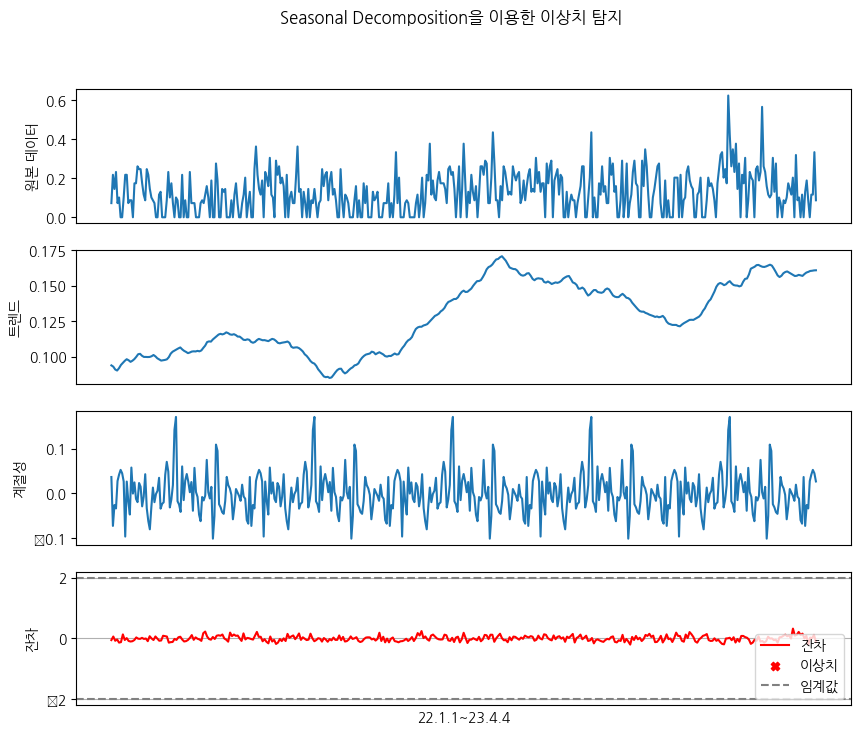

In [8]:
#Seasonal Decomposition을 이용
df = pd.DataFrame(random_rows.iloc[:,0])
result = seasonal_decompose(df, model='additive', period=90)

trend = result.trend
seasonal = result.seasonal
residual = result.resid

threshold = 2
outliers = df[abs(residual) > threshold]

# 그래프 그리기
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df[df.columns[0]])
plt.xticks([])
plt.ylabel('원본 데이터')

plt.subplot(4, 1, 2)
plt.plot(df.index, trend)
plt.xticks([])
plt.ylabel('트렌드')

plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal)
plt.xticks([])
plt.ylabel('계절성')

plt.subplot(4, 1, 4)
plt.plot(df.index, residual, color='r', label='잔차')
plt.scatter(outliers.index, outliers[df.columns[0]], color='r', marker='X', label='이상치')
plt.axhline(y=threshold, color='gray', linestyle='--', label='임계값')
plt.axhline(y=-threshold, color='gray', linestyle='--')
plt.ylabel('잔차')
plt.legend()
plt.xticks([])
plt.xlabel('22.1.1~23.4.4')
plt.suptitle('Seasonal Decomposition을 이용한 이상치 탐지')
plt.grid()

plt.show()

### DTW 알고리즘을 이용한 clustering
* https://syj9700.tistory.com/m/58

In [9]:
#pip install dtw-python

In [10]:
import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## product_info

In [11]:
product_info = pd.read_csv('./data/product_info.csv')

display(product_info)

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...


* NLP를 이용해 군집화

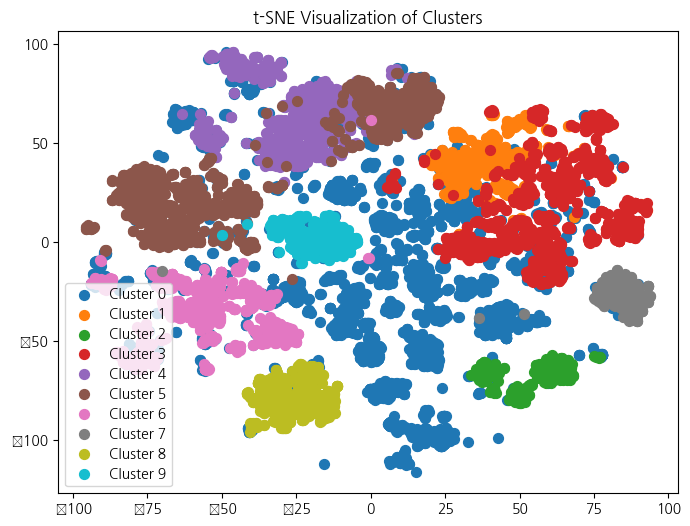

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# 데이터프레임 생성
df = product_info

# 텍스트 전처리 함수
def preprocess_text(text):
    # 숫자, 특수문자 제거
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# 텍스트 전처리 적용
df['제품특성'] = df['제품특성'].apply(preprocess_text)

# TfidfVectorizer를 사용하여 텍스트 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['제품특성'])

# 클러스터링 수 결정
num_clusters = 10

# KMeans 클러스터링 모델 생성
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X)

# t-SNE를 사용하여 2D 시각화
tsne = TSNE(n_components=2, random_state=77)
X_tsne = tsne.fit_transform(X.toarray())

# 클러스터링 결과를 데이터프레임에 추가
df['cluster'] = kmeans_model.labels_

# 2D 시각화를 위한 산점도 그리기
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(X_tsne[df['cluster'] == i, 0], X_tsne[df['cluster'] == i, 1], label=f'Cluster {i}', s=50)

plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()

In [ ]:
# 적정 군집 수 확인
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.13835597932982185


k means
* 10개
* 15개 : 0.13835597932982185
* 23개
DBSCAN : -0.0037085..

## sales
* 일일 판매금액

In [ ]:
sales = pd.read_csv('./data/sales.csv')

display(sales)

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,60690,0,40460,80920,20230,20230,60690
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27300


* 예를 들어, B002-03799-00010라는 제품명에서 브랜드를 유추 가능 B002-03799의 10번째 제품이란 의미

In [ ]:
#각 브랜드 별 제품의 개수 확인
unique_counts = sales.apply(pd.Series.nunique)
display(pd.DataFrame(unique_counts).T[:])
print('브랜드 개수 : ', unique_counts['브랜드'])

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,15890,15840,5,11,53,3170,2619,2545,2569,2714,...,384,388,395,2563,2573,2466,2326,2384,2704,2722


브랜드 개수 :  3170


In [ ]:
unique_count_제품 = pd.DataFrame(sales['제품'].value_counts().T)

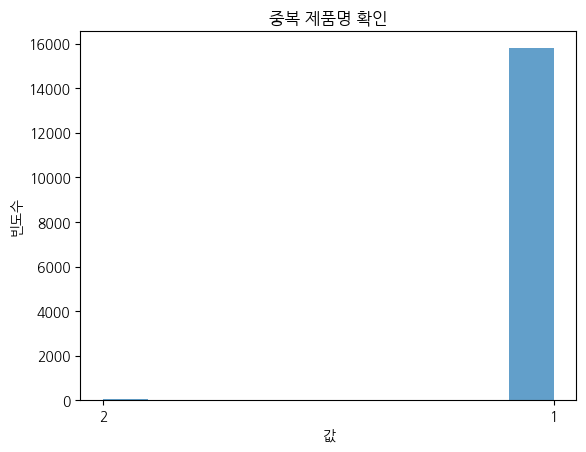

In [ ]:
unique_count_제품['count'] = unique_count_제품['count'].astype('str')

plt.hist(unique_count_제품, alpha = 0.7)

plt.xlabel('값')
plt.ylabel('빈도수')
plt.title('중복 제품명 확인')

plt.show()

In [ ]:
print('제품명이 고유한 경우 : ',len(unique_count_제품[unique_count_제품['count'] == 1]))
print('동일 제품명이 2개인 경우 : ',len(unique_count_제품[unique_count_제품['count'] == 2]))

제품명이 고유한 경우 :  15790
동일 제품명이 2개인 경우 :  50


* 15890개의 제품들 중 제품명이 중복인 제품은 50개
* 데이콘 데이터 탭의 설명에 따르면

* '단, 제품이 동일하여도 판매되고 있는 고유 ID 별로 기재한 분류 정보가 상이할 수 있음 즉 고유 ID가 다르다면, 제품이 같더라도 다른 판매 채널'

In [ ]:
unique_count_제품 = pd.DataFrame(sales['제품'].value_counts().T)
product_list = unique_count_제품[unique_count_제품['count'] == 2].index.tolist() # 중복된 50개 제품명을 리스트에 저장

In [ ]:
display(sales_t)

,0,1,2,3,4,5,6,7,8,9,...,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889
ID,0,1,2,3,4,5,6,7,8,9,...,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889
제품,B002-00001-00001,B002-00002-00001,B002-00002-00002,B002-00002-00003,B002-00003-00001,B002-00003-00002,B002-00003-00003,B002-00003-00004,B002-00003-00005,B002-00003-00006,...,B002-03798-00052,B002-03798-00053,B002-03798-00054,B002-03798-00055,B002-03799-00001,B002-03799-00002,B002-03799-00003,B002-03799-00004,B002-03799-00005,B002-03799-00010
대분류,B002-C001-0002,B002-C001-0003,B002-C001-0003,B002-C001-0003,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,...,B002-C001-0003,B002-C001-0003,B002-C001-0003,B002-C001-0003,B002-C001-0002,B002-C001-0003,B002-C001-0003,B002-C001-0003,B002-C001-0003,B002-C001-0002
중분류,B002-C002-0007,B002-C002-0008,B002-C002-0008,B002-C002-0008,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,...,B002-C002-0008,B002-C002-0008,B002-C002-0008,B002-C002-0008,B002-C002-0002,B002-C002-0008,B002-C002-0008,B002-C002-0008,B002-C002-0008,B002-C002-0004
소분류,B002-C003-0038,B002-C003-0044,B002-C003-0044,B002-C003-0044,B002-C003-0003,B002-C003-0003,B002-C003-0003,B002-C003-0003,B002-C003-0003,B002-C003-0003,...,B002-C003-0044,B002-C003-0044,B002-C003-0044,B002-C003-0044,B002-C003-0010,B002-C003-0042,B002-C003-0044,B002-C003-0044,B002-C003-0044,B002-C003-0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0,44800,0,0,0,0,0,0,0,0,...,28000,0,0,0,0,0,40460,0,0,0
2023-04-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,80920,0,0,0
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20230,0,0,0
2023-04-03,0,44800,0,0,0,0,0,0,0,0,...,0,44500,24900,13000,0,0,20230,0,0,0


In [ ]:
sales_t = sales.T
sales_t.columns = sales['제품']
display(sales_t[product_list])

제품,B002-00070-00009,B002-00070-00009,B002-01083-00002,B002-01083-00002,B002-03481-00001,B002-03481-00001,B002-03796-00008,B002-03796-00008,B002-01523-00045,B002-01523-00045,...,B002-03406-00007,B002-03406-00007,B002-02232-00002,B002-02232-00002,B002-01303-00001,B002-01303-00001,B002-02232-00003,B002-02232-00003,B002-01069-00001,B002-01069-00001
ID,215,216,4530,4531,14720,14721,15825,15826,6024,6025,...,14376,14377,9514,9515,5339,5340,9516,9517,4468,4469
제품,B002-00070-00009,B002-00070-00009,B002-01083-00002,B002-01083-00002,B002-03481-00001,B002-03481-00001,B002-03796-00008,B002-03796-00008,B002-01523-00045,B002-01523-00045,...,B002-03406-00007,B002-03406-00007,B002-02232-00002,B002-02232-00002,B002-01303-00001,B002-01303-00001,B002-02232-00003,B002-02232-00003,B002-01069-00001,B002-01069-00001
대분류,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0002,B002-C001-0002,...,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001,B002-C001-0001
중분류,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0004,B002-C002-0004,...,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001,B002-C002-0001
소분류,B002-C003-0001,B002-C003-0004,B002-C003-0001,B002-C003-0004,B002-C003-0001,B002-C003-0004,B002-C003-0003,B002-C003-0004,B002-C003-0022,B002-C003-0022,...,B002-C003-0001,B002-C003-0004,B002-C003-0002,B002-C003-0002,B002-C003-0003,B002-C003-0004,B002-C003-0002,B002-C003-0002,B002-C003-0001,B002-C003-0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,323700,0,67900,0,9900,0,0
2023-04-01,0,7900,0,0,0,0,0,0,0,0,...,0,0,0,411990,0,16000,0,9900,0,0
2023-04-02,0,15800,0,0,0,0,0,0,0,0,...,0,0,0,375780,0,235700,0,0,0,0
2023-04-03,0,15800,0,0,0,0,0,17440,0,0,...,0,0,0,375780,0,67900,0,0,0,0


중복된 제품명의 판매량 데이터를 확인

* 예시로 B002-00070-00009를 사용

In [ ]:
ex_sales = sales_t['B002-00070-00009']['2022-01-01':]
display(ex_sales)

제품,B002-00070-00009,B002-00070-00009
2022-01-01,446400,0
2022-01-02,279000,0
2022-01-03,195300,0
2022-01-04,139500,0
2022-01-05,139500,0
...,...,...
2023-03-31,0,0
2023-04-01,0,7900
2023-04-02,0,15800
2023-04-03,0,15800


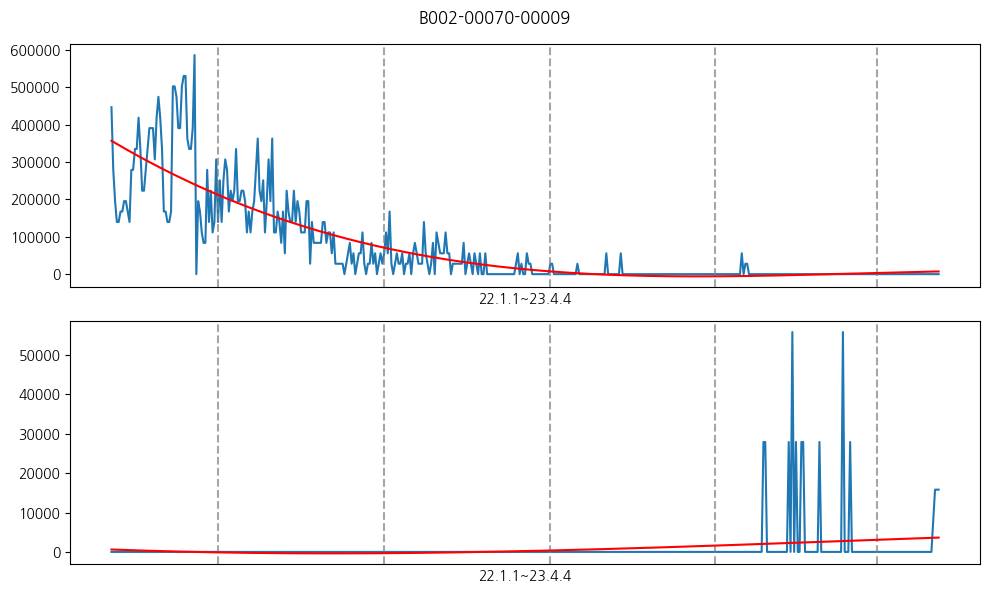

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(2) :
    plt.subplot(2, 1, i+1)
    plt.plot(ex_sales.index, ex_sales.iloc[:,i])
    plt.xticks([]) #눈금 가리기
    plt.xlabel('22.1.1~23.4.4')

    seasons = ['2022-03-01', '2022-06-01', '2022-09-01', '2022-12-01', '2023-03-01']
    for season in seasons: #계절에 따른 구분선 그리기
        plt.axvline(x=season, color='gray', linestyle='--', alpha=0.7)
    
    coefficients = np.polyfit(range(len(ex_sales)), ex_sales.iloc[:,i].astype(float), 3)
    polynomial = np.poly1d(coefficients)
    plt.plot(ex_sales.index, polynomial(range(len(ex_sales))), color='r', label='추세선')

plt.suptitle('B002-00070-00009')

plt.tight_layout() #그래프 간 간격 조정
plt.show()

* 중복된 제품명을 가지는 두 제품이 동시에 판매되지 않는다는 생각이 들었다. 

In [ ]:
ex_sales = sales_t[product_list]['2022-01-01':]

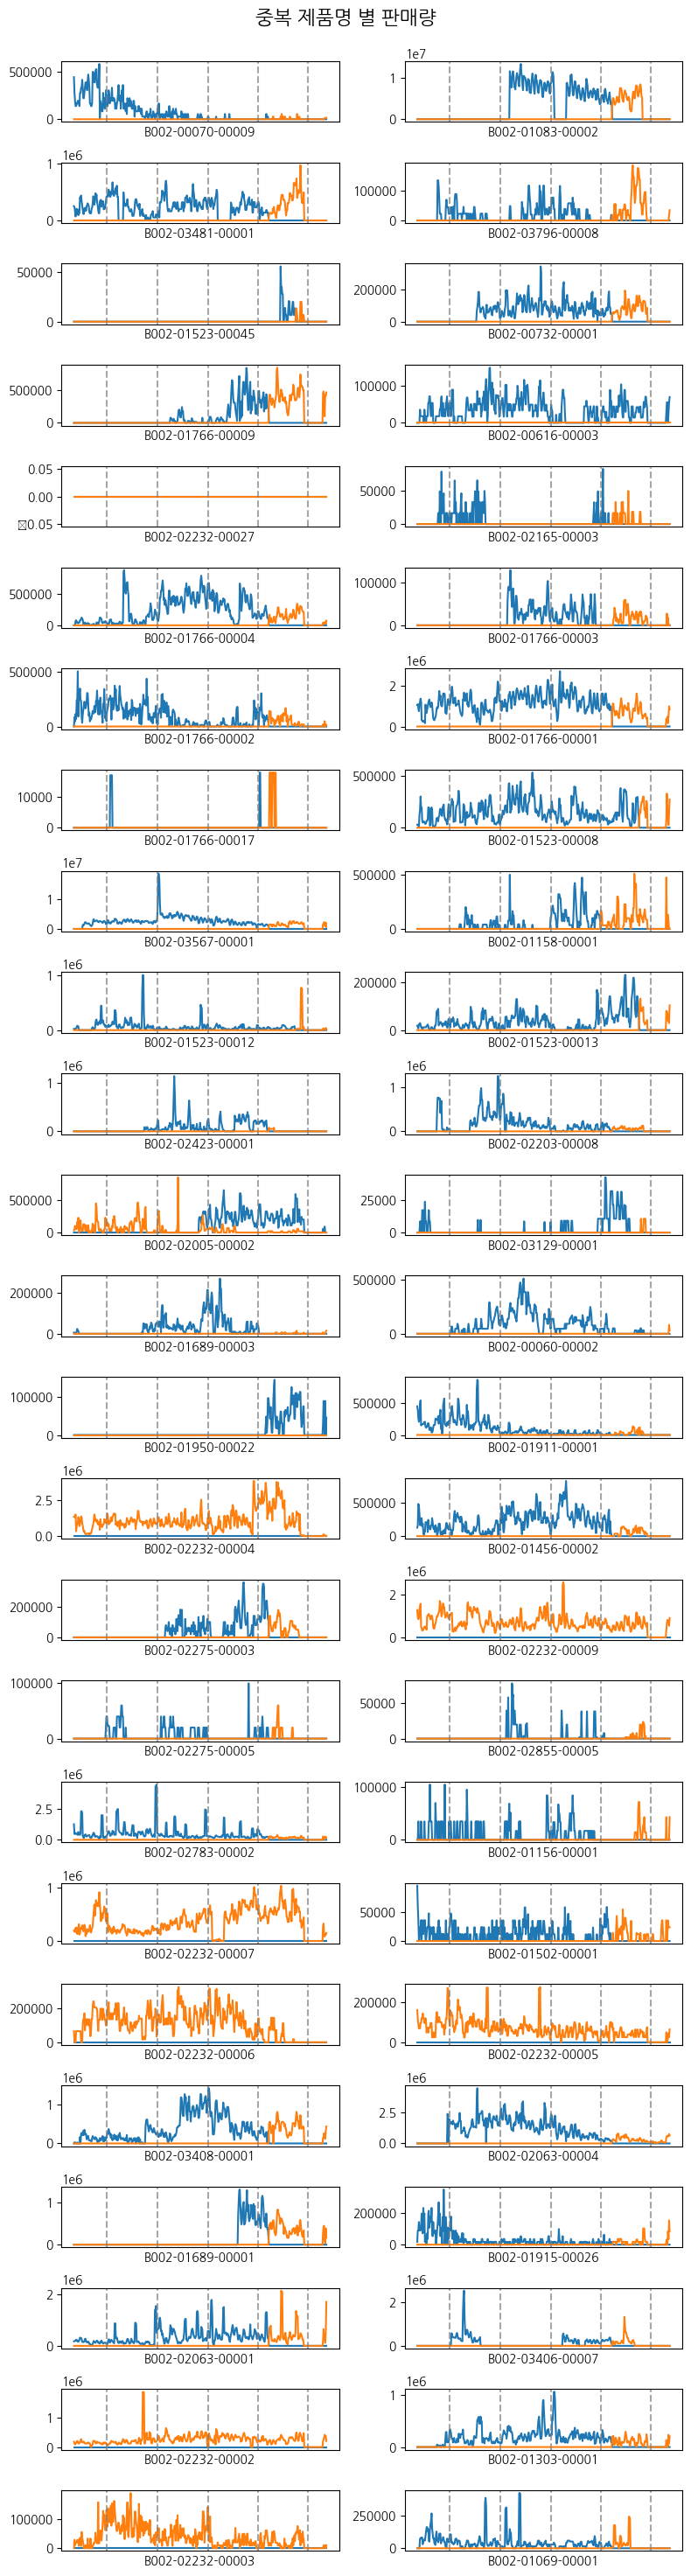

In [ ]:
plt.figure(figsize=(8, 30))
seasons = ['2022-03-01', '2022-06-01', '2022-09-01', '2022-12-01', '2023-03-01']
c = 0

for i in range(50) :
    plt.subplot(25, 2, i+1)
    plt.plot(ex_sales.index, ex_sales.iloc[:,c])
    plt.plot(ex_sales.index, ex_sales.iloc[:,c+1])
    plt.xticks([]) #눈금 가리기
    plt.xlabel(ex_sales.columns[c])
    c += 2
    for season in seasons: #계절에 따른 구분선 그리기
        plt.axvline(x=season, color='gray', linestyle='--', alpha=0.7)


plt.tight_layout() #그래프 간 간격 조정
plt.subplots_adjust(top=0.96)
plt.suptitle('중복 제품명 별 판매량', fontsize = 16)
plt.show()

* B002-02005-00002와 같이 여러 판매 처널에서 동시에 판매되는 경우가 존재하기는 했다.
* 50가지 제품명을 product_info에서 찾아보기로 했다.

In [ ]:
print(len(product_info[product_info['제품'].isin(product_list)]))
display(product_info[product_info['제품'].isin(product_list)])

39


,제품,제품특성
73,B002-01766-00001,단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리대두단백질...
74,B002-01766-00009,종류_A단백질종류:BCAA 단백질성분:동물성+식물성 단백질성분:농축유청단백질(WPC...
79,B002-00732-00001,단백질종류:동물성+식물성 단백질:6g 맛:초코 :1개 17g
144,B002-01156-00001,단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질...
157,B002-02275-00003,단백질종류:식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리대두단백질(ISP...
164,B002-03567-00001,단백질종류:동물성+식물성 단백질:18g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일...
167,B002-01069-00001,단백질:2.5g 1일 총 섭취량:1개 :1개 21g x 12개입
178,B002-01689-00003,"단백질종류:식물성 단백질성분:분리대두단백질(ISP) 단백질:14g :1개, 단백질종..."
186,B002-03481-00001,종류:웨이 단백질종류:동물성 단백질성분:농축유청단백질(WPC) 단백질:18g 섭취대...
189,B002-02063-00004,주요 기능성(식약처인증):영양보충 영양소 원료명(식약처고시):비타민D 영양소 원료명...


* 별 다른 특징은 찾지 못했지만, 브랜드 특성 데이터를 벡터 임베딩하여 유사 제품군을 구할 수 있을 것 같다.

* 각 브랜드 내 판매금액 분포를 확인해보겠다.

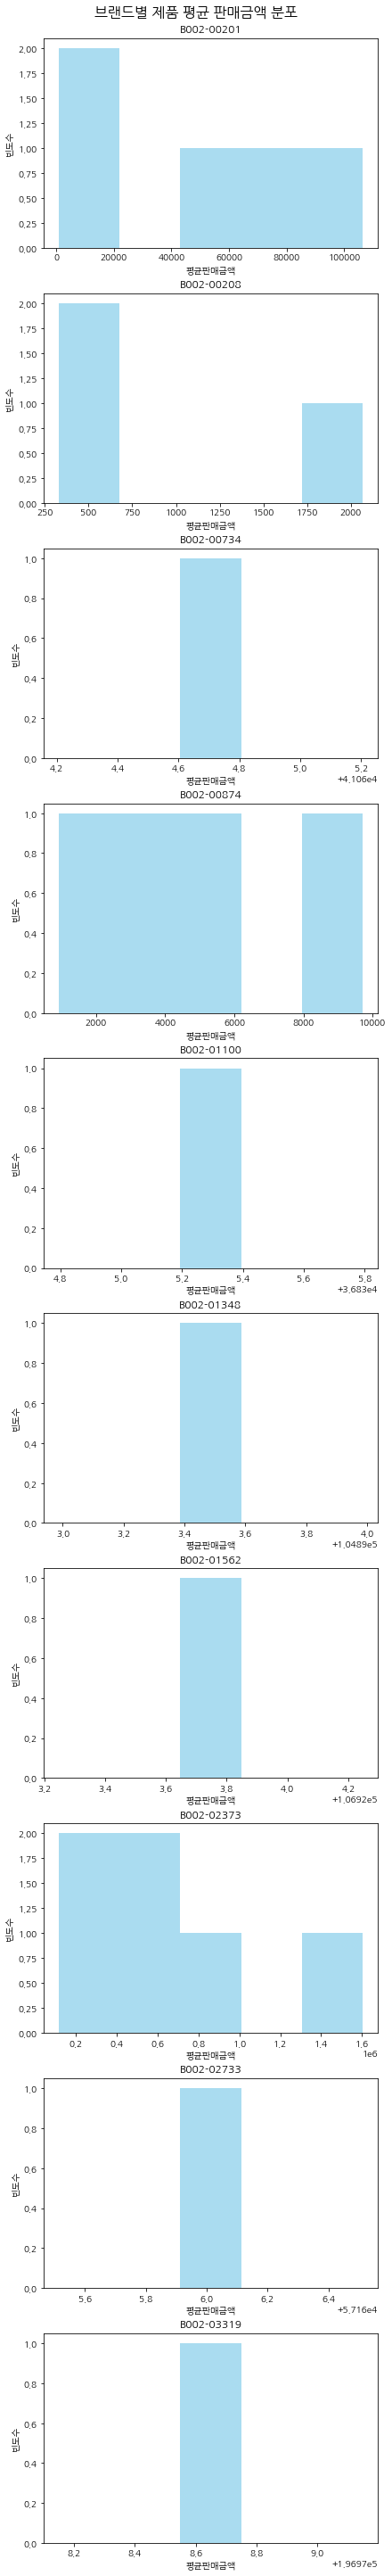

In [ ]:
grouped_sales = sales.drop(['제품','대분류','중분류','소분류'],axis=1,inplace=False)
seed_everything(77)
random_brand_ = np.random.choice(grouped_sales['브랜드'].unique(), size=10)
grouped_sales = grouped_sales[grouped_sales['브랜드'].isin(random_brand_)].groupby('브랜드')

fig, axs = plt.subplots(len(grouped_sales), figsize=(6, 4 * len(grouped_sales)), constrained_layout=True)
fig.suptitle('브랜드별 제품 평균 판매금액 분포', fontsize=16)
fig.subplots_adjust(top=0.96)

for i, (brand, group_df) in enumerate(grouped_sales) :
    temp = group_df['ID']
    group_df.drop(columns=['ID','브랜드'],inplace = True)
    group_df = group_df.T
    group_df.columns = temp
    #for k in range(len(temp))
    axs[i].hist(group_df.mean(), bins=5, color='skyblue', alpha=0.7)
    axs[i].set_title(f'{brand}')
    axs[i].set_xlabel('평균판매금액')
    axs[i].set_ylabel('빈도수')


* 각 브랜드 별 판매금액과 각 브랜드 별 연관키워드 언급 횟수를 연관 지어 시각화해보겠다.

In [ ]:
brand_sales = sales.groupby('브랜드').sum()
brand_sales.drop(['ID','대분류','중분류','소분류'],axis=1,inplace=True)

* 20개 샘플을 골라 그려보겠다

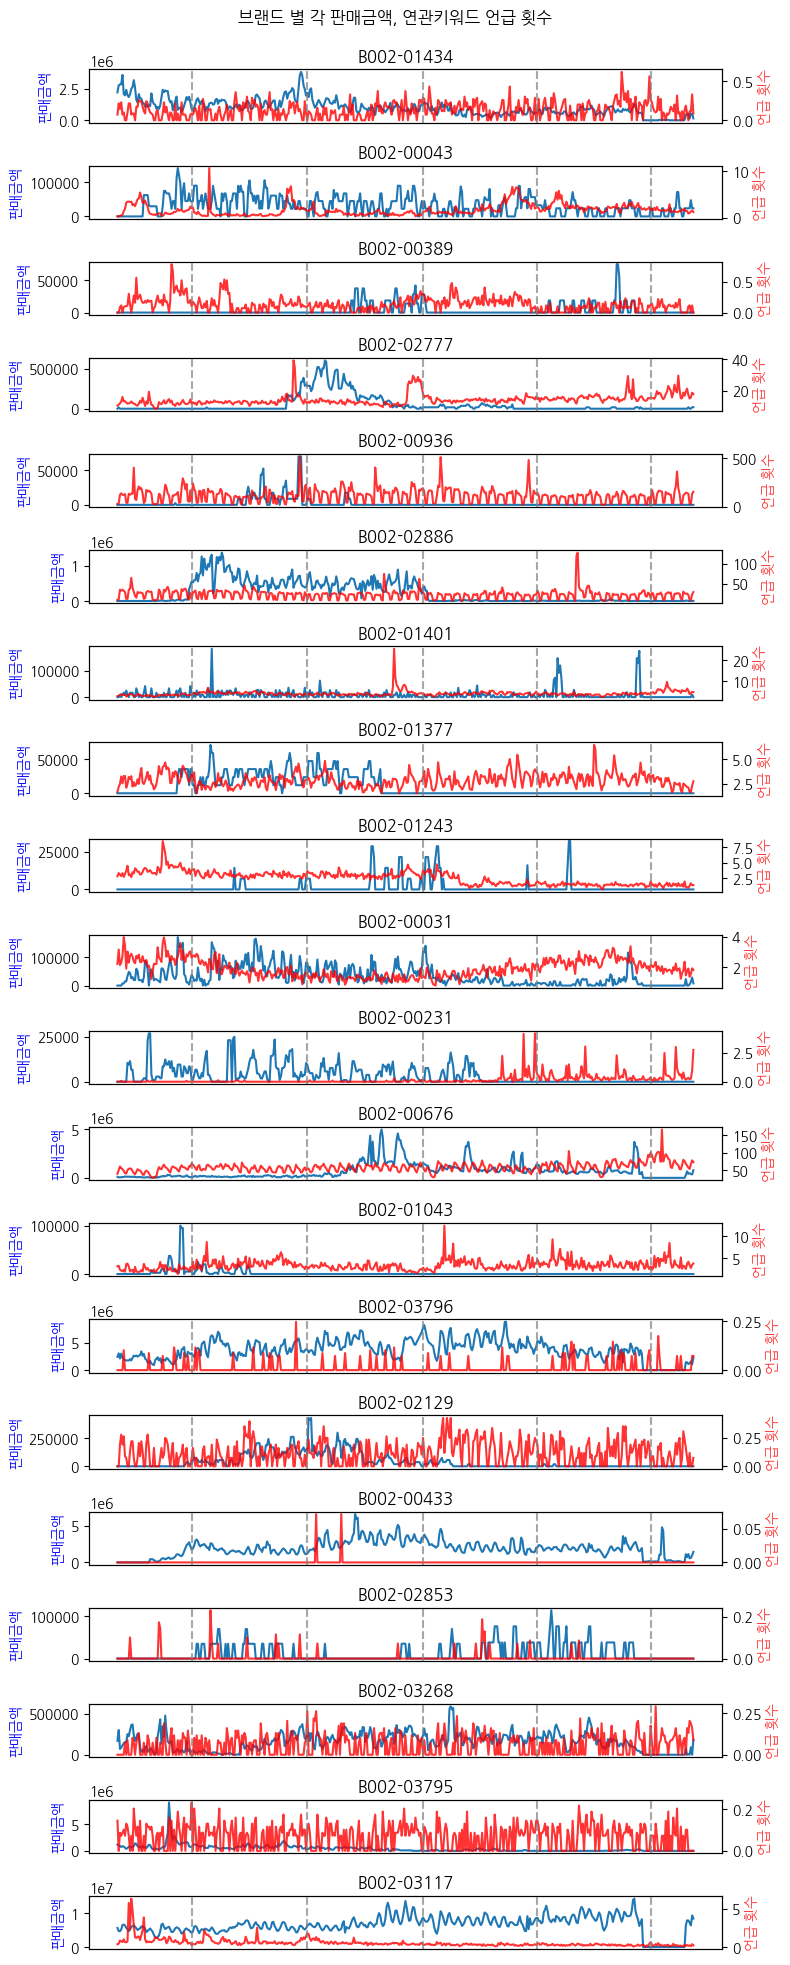

In [ ]:
# 랜덤하게 20개를 뽑는다
random_brands = brand_sales.sample(n=20, random_state=77)
random_brands = random_brands.T
random_brands.drop(index = '제품',inplace=True)
#랜덤하게 뽑힌 브랜드에 맞는 keyword 언급 데이터를 불러온다.
tmp = brand_keyword.T 
tmp.columns = brand_keyword['브랜드']
tmp.drop(index='브랜드',inplace=True, axis=1)
random_keyword_brands = tmp[random_brands.columns]

fig, axes = plt.subplots(20, 1, figsize=(8,20), sharex=True)

for i in range(20) :
    axes[i].plot(random_brands.index, random_brands.iloc[:,i])
    axes[i].set_ylabel(f'판매금액', color='b')
    ax2 = axes[i].twinx()
    ax2.plot(random_keyword_brands.index, random_keyword_brands.iloc[:,i], 'red', alpha=0.8)
    ax2.set_ylabel(f'언급 횟수', color='red', alpha=0.8)
    plt.xticks([]) #눈금 가리기
    plt.xlabel('22.1.1~23.4.4')

    seasons = ['2022-03-01', '2022-06-01', '2022-09-01', '2022-12-01', '2023-03-01']
    for season in seasons: #계절에 따른 구분선 그리기
        plt.axvline(x=season, color='gray', linestyle='--', alpha=0.7)

    plt.title(random_brands.columns[i])

plt.suptitle('브랜드 별 각 판매금액, 연관키워드 언급 횟수')
plt.tight_layout() #그래프 간 간격 조정
plt.subplots_adjust(top=0.95)
plt.show()

### train
* 일일 판매량

In [ ]:
train = pd.read_csv('./data/train.csv')

display(train)

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


* 각 브랜드 별 판매량과 각 브랜드 별 연관키워드 언급 횟수를 연관 지어 시각화해보겠다.

In [ ]:
brand_train = train.groupby('브랜드').sum()
brand_train.drop(['ID','대분류','중분류','소분류'],axis=1,inplace=True)

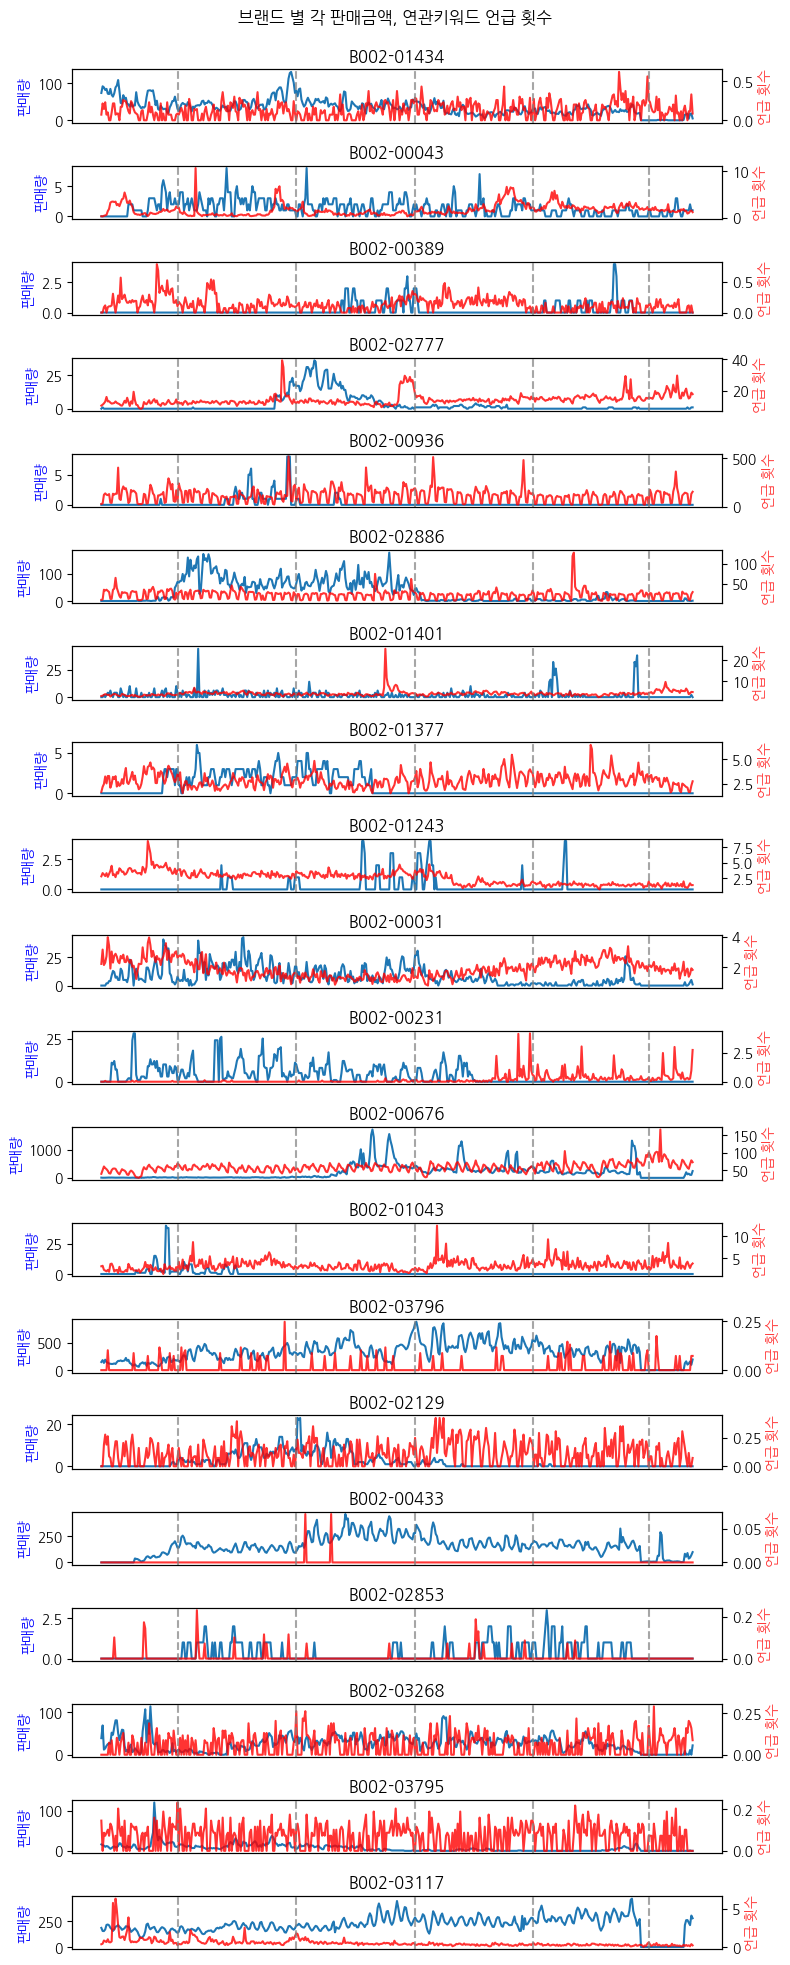

In [ ]:
# 랜덤하게 20개를 뽑는다
random_brands = brand_train.sample(n=20, random_state=77)
random_brands = random_brands.T
random_brands.drop(index = '제품',inplace=True)
#랜덤하게 뽑힌 브랜드에 맞는 keyword 언급 데이터를 불러온다.
tmp = brand_keyword.T 
tmp.columns = brand_keyword['브랜드']
tmp.drop(index='브랜드',inplace=True, axis=1)
random_keyword_brands = tmp[random_brands.columns]

fig, axes = plt.subplots(20, 1, figsize=(8,20), sharex=True)

for i in range(20) :
    axes[i].plot(random_brands.index, random_brands.iloc[:,i])
    axes[i].set_ylabel(f'판매량', color='b')
    ax2 = axes[i].twinx()
    ax2.plot(random_keyword_brands.index, random_keyword_brands.iloc[:,i], 'red', alpha=0.8)
    ax2.set_ylabel(f'언급 횟수', color='red', alpha=0.8)
    plt.xticks([]) #눈금 가리기
    plt.xlabel('22.1.1~23.4.4')

    seasons = ['2022-03-01', '2022-06-01', '2022-09-01', '2022-12-01', '2023-03-01']
    for season in seasons: #계절에 따른 구분선 그리기
        plt.axvline(x=season, color='gray', linestyle='--', alpha=0.7)

    plt.title(random_brands.columns[i])

plt.suptitle('브랜드 별 각 판매량, 연관키워드 언급 횟수')
plt.tight_layout() #그래프 간 간격 조정
plt.subplots_adjust(top=0.95)
plt.show()

* Seasonal Decomposition을 하고, trend와 언급 횟수가 관련이 있는지 시각화 해보겠다.

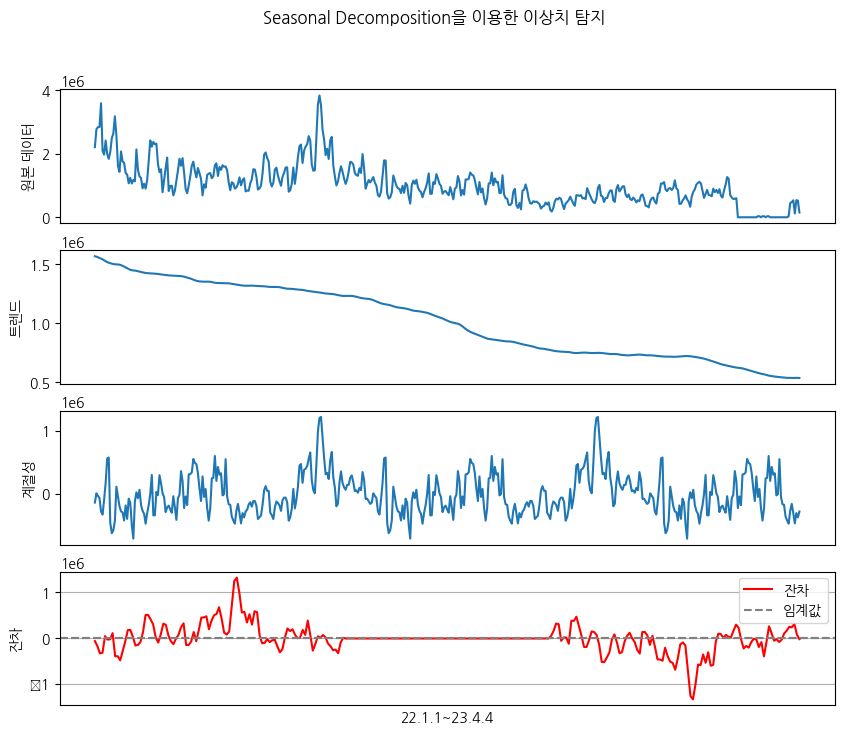

In [ ]:
#Seasonal Decomposition을 이용
df = pd.DataFrame(random_brands.iloc[:,0])
result = seasonal_decompose(df, model='additive', period=180)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

threshold = 2
outliers = df[abs(residual) > threshold]

# 그래프 그리기
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df[df.columns[0]])
plt.xticks([])
plt.ylabel('원본 데이터')

plt.subplot(4, 1, 2)
plt.plot(df.index, trend)
plt.xticks([])
plt.ylabel('트렌드')

plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal)
plt.xticks([])
plt.ylabel('계절성')

plt.subplot(4, 1, 4)
plt.plot(df.index, residual, color='r', label='잔차')
#plt.scatter(outliers.index, outliers[df.columns[0]], color='r', marker='X', label='이상치')
plt.axhline(y=threshold, color='gray', linestyle='--', label='임계값')
plt.axhline(y=-threshold, color='gray', linestyle='--')
plt.ylabel('잔차')
plt.legend()
plt.xticks([])
plt.xlabel('22.1.1~23.4.4')
plt.suptitle('Seasonal Decomposition을 이용한 이상치 탐지')
plt.grid()

plt.show()

## sample_submission
* 제출용 파일

In [ ]:
sample_submission = pd.read_csv('./data/sample_submission.csv')

display(sample_submission)

,ID,2023-04-05,2023-04-06,2023-04-07,2023-04-08,2023-04-09,2023-04-10,2023-04-11,2023-04-12,2023-04-13,...,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24,2023-04-25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15887,15887,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
